# Introduction

There are two main types of classification problems:

Binary or binomial classification: exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
Multiclass or multinomial classification: three or more classes of the outputs to choose from

# 1. Logistic Regression

Logistic regression is used for binary classification problems (those where the data has only two classes). Logistic regression is known as a simpler classification technique and is often used as a starting point to establish a baseline before moving to more complex model types.

Logistic regression uses a linear combination of the predictor variables to estimate the probability of the outcome being 0 or 1. This is why the word “regression” is in the name. Because the probability is calculated as a linear combination of the predictor variables, logistic regression models are relatively straightforward to interpret.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### Load the Iris dataset

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

#### Map target values to their corresponding names

In [3]:
target_names = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['target'] = iris_df['target'].map(target_names)

### Exploratory Data Analysis (EDA)
Displaying basic information about the dataset

In [4]:
print("Basic information about the dataset:")
print(iris_df.info())

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


#### Statistical Summary of the Dataset

The statistical summary of the dataset, obtained using the `describe()` function in pandas, provides useful insights into the distribution and summary statistics of each numerical feature in the dataset. Here's how to interpret the output:

- **Mean (Average)**:
  - The mean represents the average value of each feature across all the samples in the dataset.
  - A high mean indicates that the feature tends to have higher values overall, while a low mean indicates lower values.
- **Standard Deviation**:
  - The standard deviation measures the spread or variability of the data around the mean.
  - A higher standard deviation indicates greater variability in the data, while a lower standard deviation indicates less variability.
- **Minimum and Maximum**:
  - The minimum and maximum values represent the smallest and largest values observed for each feature in the dataset.
  - They provide insight into the range of values for each feature.
- **25th, 50th (Median), and 75th Percentiles**:
  - These percentiles represent the values below which a certain percentage of the data falls.
  - The median (50th percentile) represents the middle value of the dataset when sorted in ascending order.
  - The 25th and 75th percentiles represent the values below which 25% and 75% of the data fall, respectively.

Interpreting the statistical summary allows us to gain a better understanding of the distribution, central tendency, and variability of the numerical features in the dataset. It helps us identify potential outliers, assess the range of values for each feature, and make informed decisions about data preprocessing and modeling strategies.


### Displaying statistical summary of the dataset

In [5]:
print("\nStatistical summary of the dataset:")
print(iris_df.describe())


Statistical summary of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### Visualizing the distribution of each feature

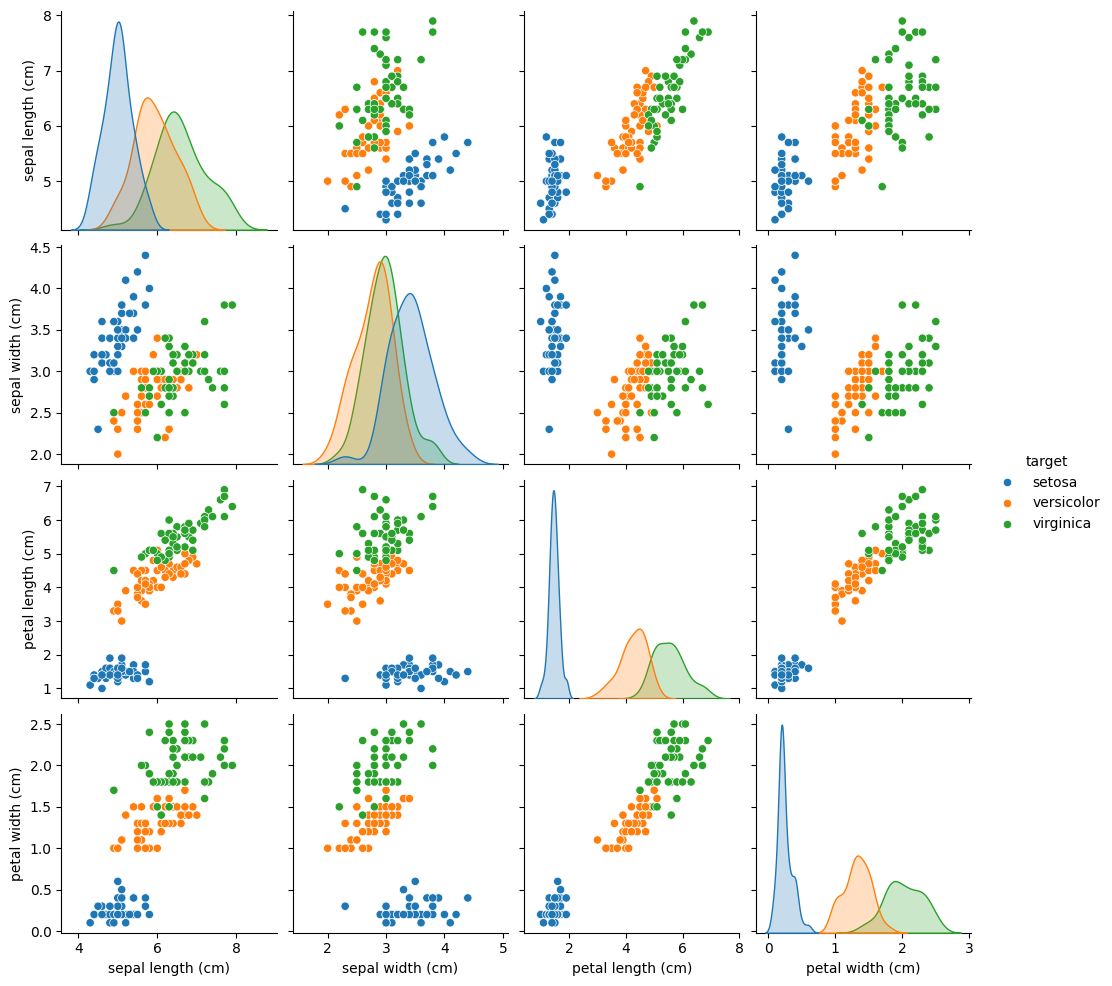

In [6]:
sns.pairplot(iris_df, hue="target")
plt.show()

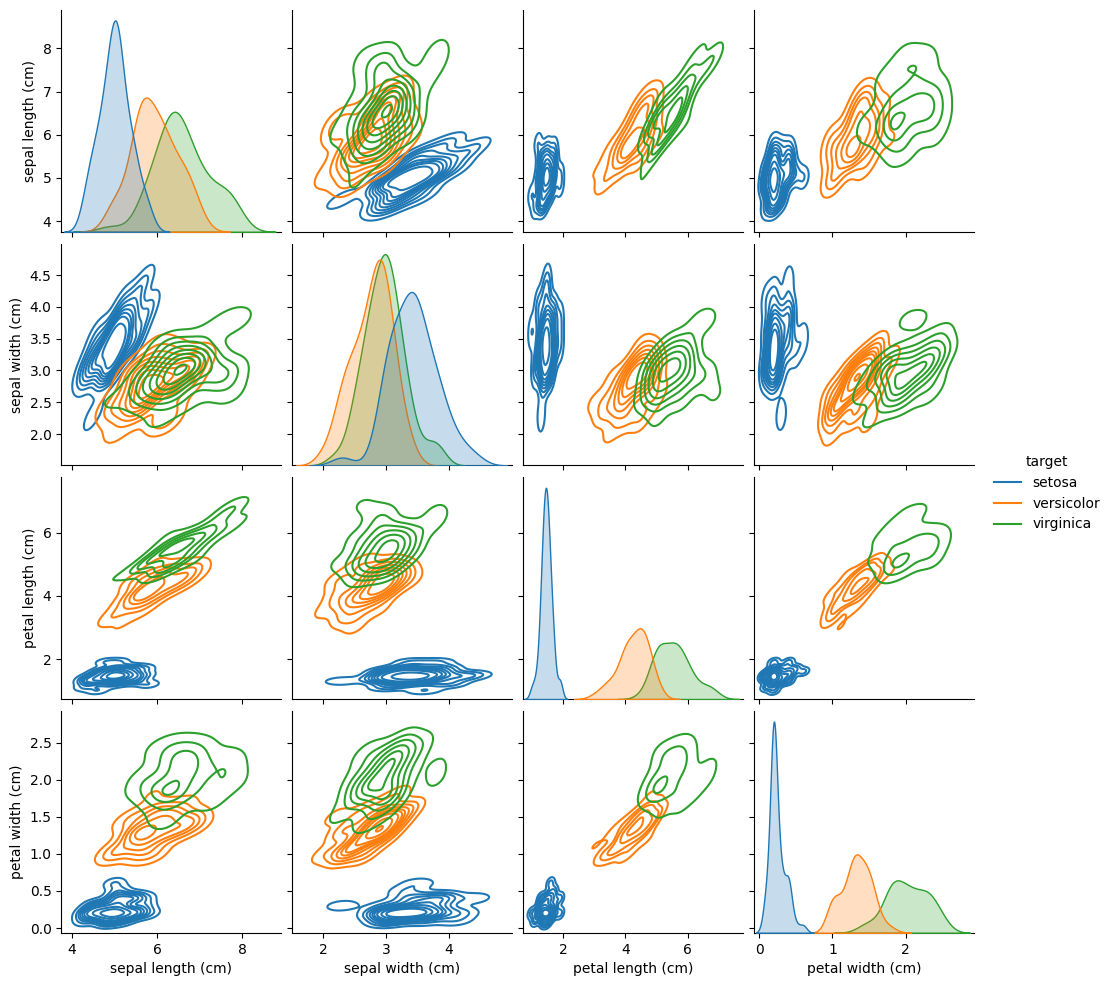

In [7]:
sns.pairplot(iris_df, hue="target", kind="kde")
plt.show()

### Splitting the dataset into features (X) and target (y)

In [8]:
X = iris_df.drop('target', axis=1)
y = iris_df['target']

### Splitting the dataset into training and testing sets

#### Explanation of Train-Test Split

The line `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)` is a crucial step in machine learning for evaluating the performance of a model. Here's a breakdown of what each part of this line does:

- **`X`**: Represents the feature matrix of the dataset, containing the independent variables used for prediction.
- **`y`**: Represents the target vector of the dataset, containing the dependent variable to be predicted.
- **`train_test_split`**: This function is used to split the dataset into two subsets: one for training the model and the other for testing the model's performance.
- **`test_size=0.2`**: Specifies the proportion of the dataset to include in the test split. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training.
- **`random_state=42`**: Sets the seed for random number generation. This ensures that the data is split in the same way each time the code is executed, making the results reproducible.

After executing this line of code, we have:
- **`X_train`**: The training set of features.
- **`X_test`**: The test set of features.
- **`y_train`**: The training set of target values.
- **`y_test`**: The test set of target values.

Splitting the data into training and testing sets allows us to train the model on one subset of the data and evaluate its performance on an independent subset. This helps us assess how well the model generalizes to new, unseen data.


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the logistic regression model

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Evaluating the model

#### Guide to Understanding the Classification Report

A classification report provides a summary of the performance metrics for a classification model. Here's a brief guide to interpreting the key components of a classification report:

- **Precision**:
  - Precision measures the proportion of true positive predictions (correctly predicted instances) among all instances predicted as positive.
  - It is calculated as the ratio of true positives to the sum of true positives and false positives.
  - High precision indicates a low false positive rate.

- **Recall**:
  - Recall, also known as sensitivity or true positive rate, measures the proportion of true positive predictions among all actual positive instances.
  - It is calculated as the ratio of true positives to the sum of true positives and false negatives.
  - High recall indicates a low false negative rate.

- **F1-score**:
  - The F1-score is the harmonic mean of precision and recall.
  - It provides a balance between precision and recall and is useful when the classes are imbalanced.

- **Support**:
  - Support represents the number of instances of each class in the test set.
  - It provides context for interpreting the precision, recall, and F1-score metrics by indicating the size of the dataset for each class.

- **Accuracy**:
  - Accuracy measures the overall correctness of the model's predictions.
  - It is calculated as the ratio of the number of correct predictions to the total number of predictions.

Understanding these metrics allows you to assess the performance of your classification model and identify areas for improvement.


In [11]:
print("\nClassification Report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### Displaying various chart and graph visualizations

#### Predicted Targets for Test Data

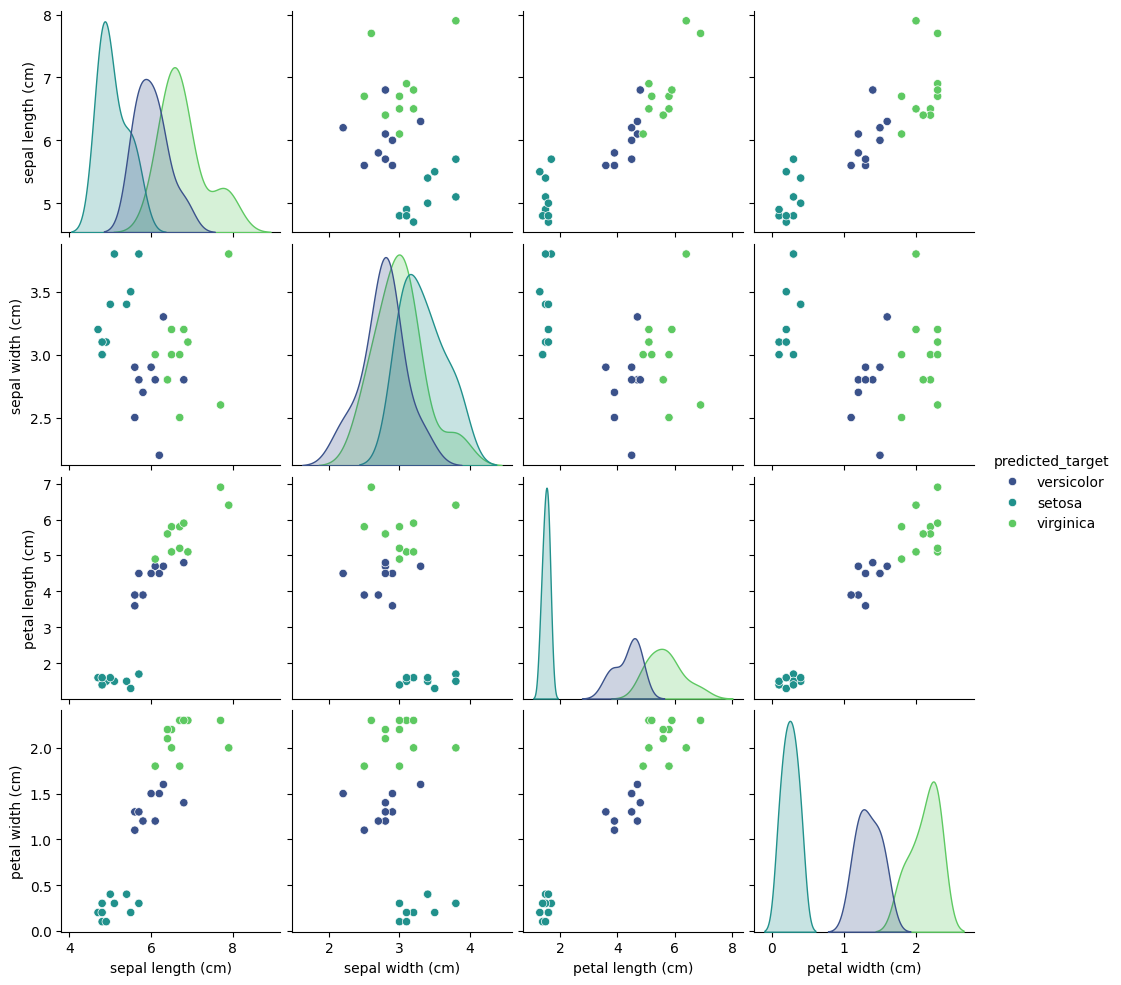

In [13]:
# Predicting target labels for the testing set
predicted_labels = model.predict(X_test)

# Creating a DataFrame with features, true target labels, and predicted target labels
pairplot_data = pd.DataFrame(X_test, columns=iris_df.columns[:-1])  # Excluding the target column
pairplot_data['true_target'] = y_test
pairplot_data['predicted_target'] = predicted_labels

# Creating pairplot for the testing set only
sns.pairplot(pairplot_data, hue='predicted_target', palette='viridis')
plt.show()

/tmp/ipykernel_6479/1359200266.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=target_name, cmap='viridis', edgecolor='k', s=20)


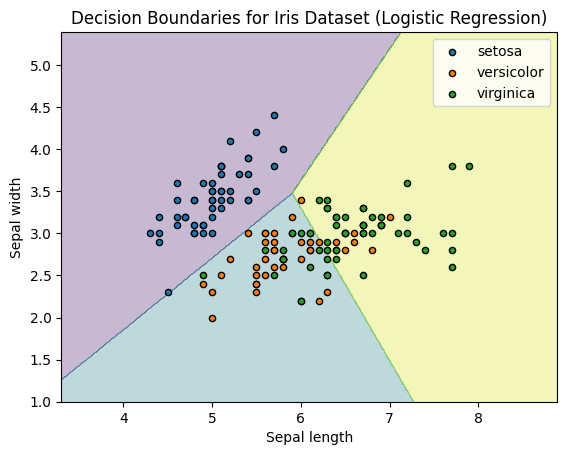

In [28]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Consider only the first two features for visualization
y = iris.target

# Fit a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class probabilities for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the training points
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X[y == i][:, 0], X[y == i][:, 1], label=target_name, cmap='viridis', edgecolor='k', s=20)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundaries for Iris Dataset (Logistic Regression)')
plt.legend()
plt.show()